In [2]:
# Import libraries and load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('../data/raw/kc_house_data.csv')

In [3]:
# Extract zipcode from address string using regex
df['zipcode'] = df.address.str.extract('[\w \-.]+, [\w \-.]+, [\w \-.]+ (\d{5})').astype('int64')

In [4]:
# List of zipcodes in King County, WA
# https://www.zillow.com/browse/homes/wa/king-county/

kc_zipcodes = [98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,
               98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,
               98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,
               98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,
               98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,
               98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,
               98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,
               98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,
               98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,
               98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]

In [5]:
# Drop values not in King County, drop duplicated rows
df = df.loc[df.zipcode.isin(kc_zipcodes)].copy()
df.drop_duplicates(inplace = True)

In [6]:
# Convert date column to datetime objects
df.date = pd.to_datetime(df.date)

In [7]:
# Notice that certain addresses have multiple records
df.address.value_counts()

Delridge Way Southwest, Seattle, Washington 98106, United States         24
Northeast 201st Street, Woodinville, Washington 98072, United States     11
Interlake Avenue North, Seattle, Washington 98103, United States         11
26th Avenue, Seattle, Washington 98122, United States                     9
12006 31st Ave NE, Seattle, Washington 98125, United States               7
                                                                         ..
3241 South 259th Place, Kent, Washington 98032, United States             1
4851 49th Avenue Southwest, Seattle, Washington 98116, United States      1
4712 South 295th Place, Auburn, Washington 98001, United States           1
29601 Southeast 51st Street, Preston, Washington 98050, United States     1
35837 23rd Place South, Federal Way, Washington 98003, United States      1
Name: address, Length: 29054, dtype: int64

In [8]:
# Extra records are a mess, multiple conflicting reports of sales price and other characteristics
df.loc[df.address == 'Delridge Way Southwest, Seattle, Washington 98106, United States'].sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
4057,1773100545,2021-06-11,629000.0,3,2.5,1580,920,3.0,NO,NO,...,1580,0,0,450,2015,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
5297,880000205,2021-07-09,399999.0,3,2.0,1260,1125,2.0,NO,NO,...,810,450,0,60,2011,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
7604,9485700178,2021-07-23,535000.0,3,2.0,1060,678,3.0,NO,NO,...,1060,0,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
11873,9485700182,2021-07-23,515000.0,3,2.0,1120,792,2.0,NO,NO,...,740,380,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
20934,9485700186,2021-07-23,525000.0,3,2.0,1070,1235,2.0,NO,NO,...,680,390,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
6905,1773100986,2021-07-27,645000.0,3,2.5,1640,1331,3.0,NO,NO,...,1530,350,240,0,2010,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
9359,9485700184,2021-07-28,525000.0,3,2.0,1060,678,3.0,NO,NO,...,1060,0,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
26157,9485700177,2021-08-04,525000.0,3,2.5,1070,1232,2.0,NO,NO,...,680,390,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
5001,880000207,2021-08-09,535000.0,3,2.0,1340,1353,3.0,NO,NO,...,1340,0,0,80,2013,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
27884,9485700180,2021-08-12,520000.0,3,2.0,1120,796,2.0,NO,NO,...,740,380,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106


In [9]:
# Naively, keep the latest transaction with greatest id number for each address
df = df.sort_values(['date', 'id']).groupby(['address']).last().reset_index()

In [10]:
# Look at numerical attributes
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode
count,2.905400e+04,2.905400e+04,29054.000000,29054.000000,29054.000000,2.905400e+04,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000
mean,4.530570e+09,1.114013e+06,3.438563,2.331280,2133.611310,1.728624e+04,1.511066,1828.061816,481.882185,337.350210,216.274179,1973.611930,94.298272,47.542621,-122.213681,98077.273560
std,2.879268e+09,8.971113e+05,0.978442,0.897079,977.470404,6.144338e+04,0.543157,880.604580,587.025960,286.301149,247.124963,31.597829,423.757484,0.146274,0.143640,54.727108
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.155265,-122.526650,98001.000000
25%,2.085200e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.428781,-122.327710,98032.000000
50%,3.864200e+09,8.700000e+05,3.000000,2.500000,1950.000000,7.588000e+03,1.500000,1580.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.556928,-122.232875,98059.000000
75%,7.280300e+09,1.312470e+06,4.000000,3.000000,2640.000000,1.080000e+04,2.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.671840,-122.126923,98117.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,98354.000000


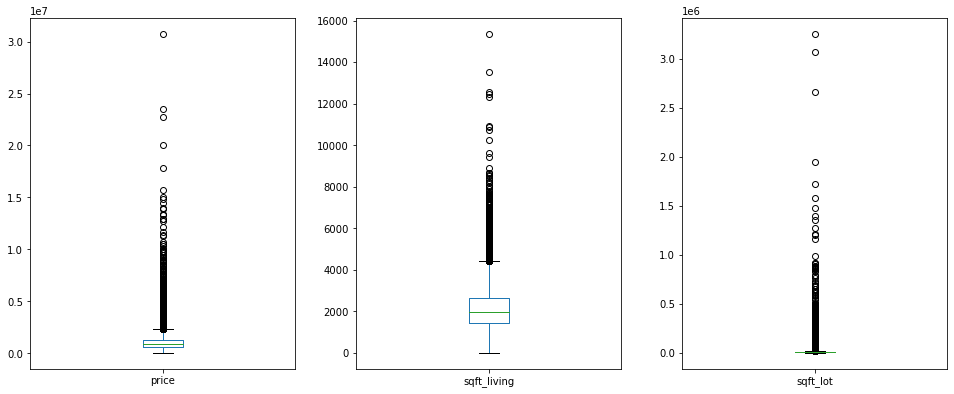

In [11]:
# Lots of outliers in price and lot sizes
fig, ax = plt.subplots(1,3,figsize = (14,6))
plt.tight_layout(pad = 3.0)
df.price.plot.box(ax = ax[0]);
df.sqft_living.plot.box(ax = ax[1]);
df.sqft_lot.plot.box(ax = ax[2]);

In [12]:
# Naively, define an acceptable upper bound for outliers of meaning as 3x standard boxplot maximum
max_outliers = (df.quantile(0.75) + (1.5 * (df.quantile(0.75) - df.quantile(0.25)))) * 3

categories_strip_max = ['price', 'sqft_living', 'sqft_lot']

# Drop entries above defined upper bound
df2 = df.copy()
max_outliers['price']
for category in categories_strip_max:
    df2 = df2.loc[df2[category] <= max_outliers[category]]

In [13]:
# Dropped around ~4.3% of data
(len(df2) - len(df))/(len(df))

-0.04295449851999725

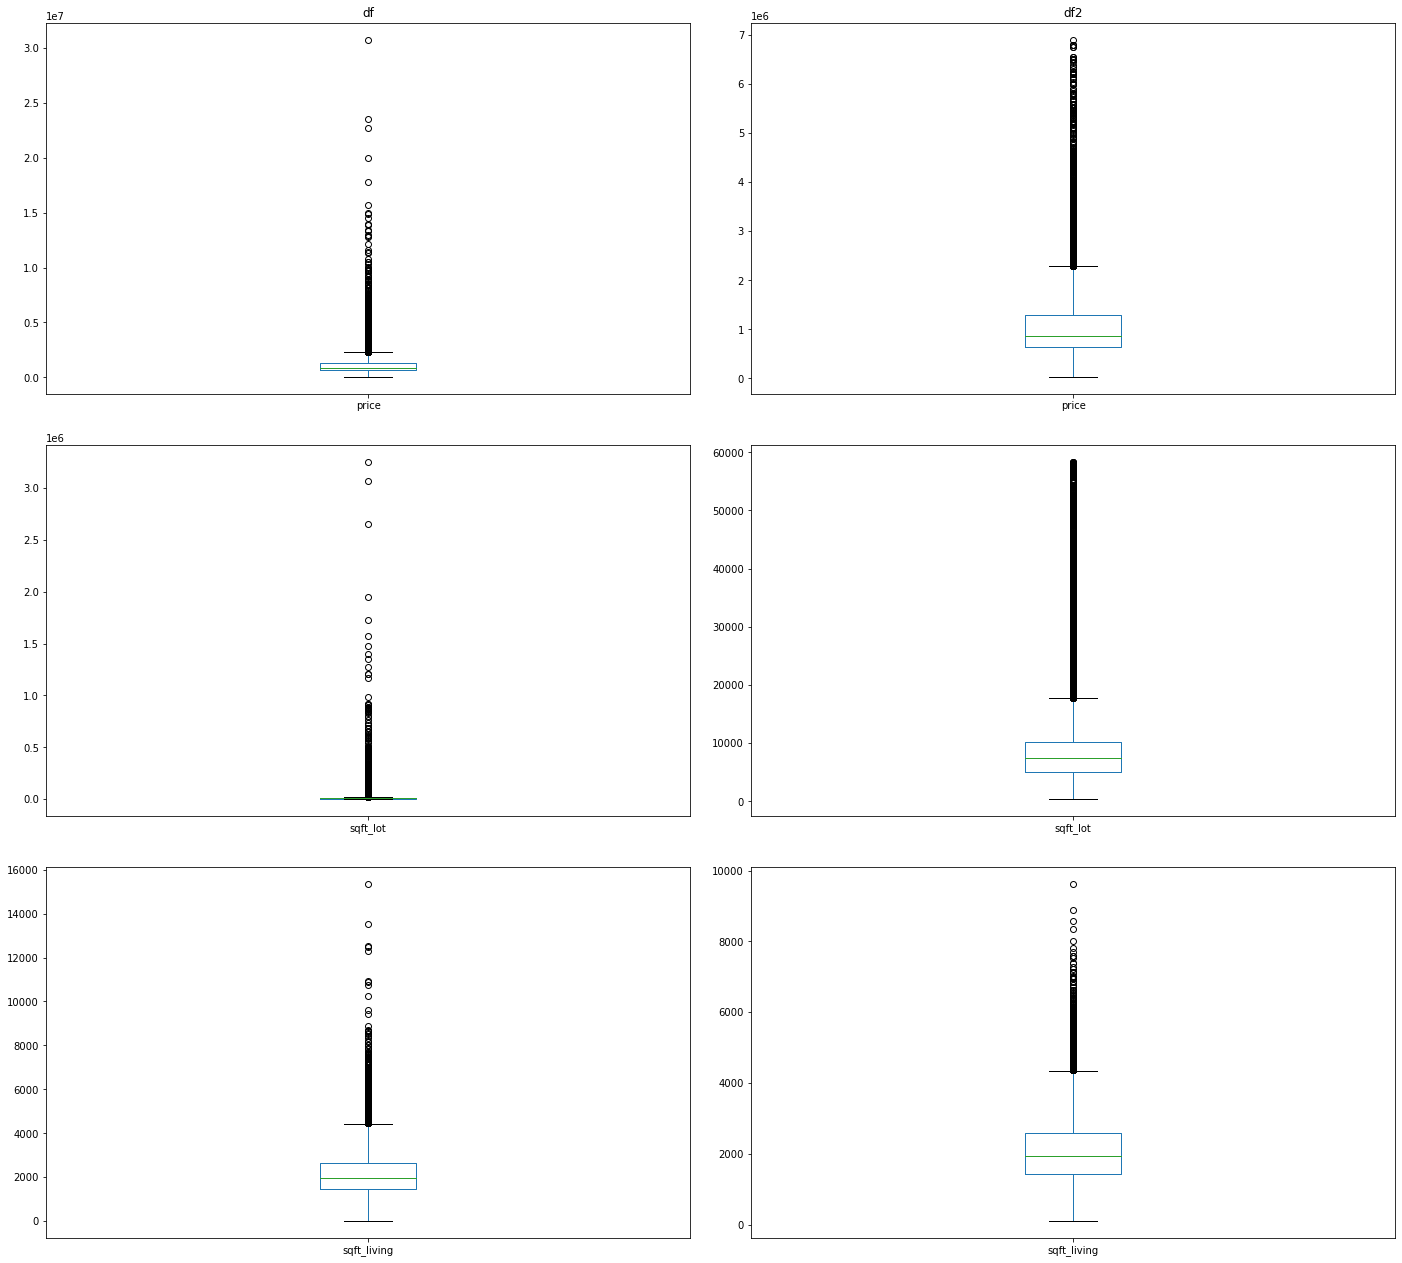

In [14]:
# Comparisons of previous and primary numerical categories
fig, ax = plt.subplots(3,2,figsize = (20,18))
plt.tight_layout(pad = 3.0)
ax[0][0].set_title('df')
ax[0][1].set_title('df2')
df.price.plot.box(ax = ax[0][0]);
df2.price.plot.box(ax = ax[0][1]);
df.sqft_lot.plot.box(ax = ax[1][0]);
df2.sqft_lot.plot.box(ax = ax[1][1]);
df.sqft_living.plot.box(ax = ax[2][0]);
df2.sqft_living.plot.box(ax = ax[2][1]);

In [15]:
# Analyze discrete numerical columns
print(df2.bathrooms.value_counts(), df2.bedrooms.value_counts(), df2.floors.value_counts(), sep = '\n\n')

2.5    7834
2.0    6629
1.0    4413
3.0    3885
3.5    1987
1.5    1701
4.0     592
4.5     465
5.0     120
5.5      83
6.0      34
0.0      30
6.5      15
7.0       6
7.5       6
0.5       5
9.5       1
Name: bathrooms, dtype: int64

3     11778
4      9054
2      3374
5      2641
6       461
1       332
7        76
0        39
8        34
9        14
10        2
11        1
Name: bedrooms, dtype: int64

1.0    13415
2.0    11111
1.5     2269
3.0      791
2.5      189
4.0       24
3.5        7
Name: floors, dtype: int64


In [16]:
# Create function to squash tiny outlier groups at extreme ends of discrete categories
def squash_groups(value, floor, ceiling):
    if value < floor:
        return floor
    elif value > ceiling:
        return ceiling
    return value

df3 = df2.copy()

df3.bathrooms = df3.bathrooms.apply(lambda x: squash_groups(x, 1.0, 6.0))
df3.bedrooms = df3.bedrooms.apply(lambda x: squash_groups(x, 1, 7))
df3.floors = df3.floors.apply(lambda x: squash_groups(x, 1.0, 3.0))

In [17]:
df3.columns

Index(['address', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt',
       'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'zipcode'],
      dtype='object')

In [18]:
# Analyze categorical groups
print(df3.waterfront.value_counts(),
      df3.greenbelt.value_counts(),
      df3.nuisance.value_counts(),
      df3.view.value_counts(),
      df3.condition.value_counts(),
      df3.grade.value_counts(),
      df3.heat_source.value_counts(),
      df3.sewer_system.value_counts(), sep = '\n\n')

NO     27402
YES      404
Name: waterfront, dtype: int64

NO     27048
YES      758
Name: greenbelt, dtype: int64

NO     23094
YES     4712
Name: nuisance, dtype: int64

NONE         24627
AVERAGE       1739
GOOD           759
EXCELLENT      472
FAIR           209
Name: view, dtype: int64

Average      16724
Good          7689
Very Good     3136
Fair           204
Poor            53
Name: condition, dtype: int64

7 Average        11235
8 Good            8441
9 Better          3365
6 Low Average     2741
10 Very Good      1201
5 Fair             350
11 Excellent       329
12 Luxury           79
4 Low               43
3 Poor              11
13 Mansion           8
1 Cabin              2
2 Substandard        1
Name: grade, dtype: int64

Gas                  19494
Electricity           5365
Oil                   2766
Gas/Solar               89
Electricity/Solar       54
Other                   10
Oil/Solar                4
Name: heat_source, dtype: int64

PUBLIC                24537
PRIVAT

In [19]:
# Convert binary categorical columns to 0s and 1s
def convert_binary_column(value):
    if value.lower().strip() == 'no':
        return 0
    return 1

df4 = df3.copy()

df4.waterfront = df4.waterfront.apply(lambda x: convert_binary_column(x))
df4.greenbelt = df4.greenbelt.apply(lambda x: convert_binary_column(x))
df4.nuisance = df4.nuisance.apply(lambda x: convert_binary_column(x))

In [20]:
df4

,address,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode
0,"1 106th Avenue Northeast, Bellevue, Washington...",2026200005,2022-05-20,3500000.0,3,1.5,2690,42750,2.0,0,...,PUBLIC,2690,220,360,410,1902,0,47.631525,-122.201171,98004
1,"10 Shore Lane, Mercer Island, Washington 98040...",2524049137,2022-05-31,2525000.0,4,3.0,2720,11761,1.0,0,...,PUBLIC,2010,1950,0,610,1957,0,47.543440,-122.236035,98040
2,"10 Sunset Court Northwest, Issaquah, Washingto...",9286100010,2022-03-30,1255000.0,3,2.5,2170,3567,1.0,0,...,PUBLIC,1320,850,400,200,2000,0,47.530530,-122.046305,98027
3,"100 4th Avenue Southwest, Pacific, Washington ...",3353400355,2022-02-17,525000.0,3,1.5,1592,8774,2.0,0,...,PUBLIC,1592,0,440,0,1993,0,47.263070,-122.251020,98047
5,"100 Northwest 79th Street, Seattle, Washington...",1646501230,2021-06-12,1810000.0,5,3.0,1930,6240,1.5,0,...,PUBLIC,1880,1120,0,490,1919,0,47.686430,-122.358220,98117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29049,"Southwest Charlestown Street, Seattle, Washing...",7628700280,2022-01-24,780000.0,3,2.0,1480,556,3.0,0,...,PUBLIC,1400,420,340,400,2021,0,47.570360,-122.359800,98106
29050,"Sunnyside Avenue North Boat Ramp, 2301 NE Nort...",4083306403,2022-02-22,1205000.0,3,2.0,1400,1445,2.0,0,...,PUBLIC,1140,510,250,460,2016,0,47.650249,-122.330841,98103
29051,"West Boston Street, Seattle, Washington 98199,...",2771603693,2021-12-20,685000.0,2,2.0,1100,855,3.0,0,...,PUBLIC,1100,0,0,300,2021,0,47.638190,-122.391020,98199
29052,"West Newton Street, Seattle, Washington 98199,...",2771604295,2022-05-02,960000.0,3,2.5,2070,3175,2.0,0,...,PUBLIC,1750,320,0,120,1907,2000,47.636760,-122.390955,98199


In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27806 entries, 0 to 29053
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   address        27806 non-null  object        
 1   id             27806 non-null  int64         
 2   date           27806 non-null  datetime64[ns]
 3   price          27806 non-null  float64       
 4   bedrooms       27806 non-null  int64         
 5   bathrooms      27806 non-null  float64       
 6   sqft_living    27806 non-null  int64         
 7   sqft_lot       27806 non-null  int64         
 8   floors         27806 non-null  float64       
 9   waterfront     27806 non-null  int64         
 10  greenbelt      27806 non-null  int64         
 11  nuisance       27806 non-null  int64         
 12  view           27806 non-null  object        
 13  condition      27806 non-null  object        
 14  grade          27806 non-null  object        
 15  heat_source    2778

In [22]:
df4.sewer_system.isna().sum()

10

In [23]:
df4.heat_source.isna().sum()

24

In [24]:
df4.heat_source.unique()

array(['Oil', 'Gas', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', nan, 'Oil/Solar'], dtype=object)

In [25]:
df5 = df4.copy()

# Convert nan heat sources into Other category, merge Oil/Solar into Other due to small sample size
df5.heat_source.fillna('Other', inplace = True)
df5.heat_source = df5.heat_source.apply(lambda x: x if x != 'Oil/Solar' else 'Other')

# Convert nan sewer system into PUBLIC, drop distinction between restricted/unrestricted
df5.sewer_system.fillna('PUBLIC', inplace = True)
df5.sewer_system = df5.sewer_system.apply(lambda x: x.split()[0])

# Select only numerical value from grade, then group 1-3 together and 12-13 together, recenter with 5 = average at middle
df5.grade = df5.grade.apply(lambda x: squash_groups(int(x.split()[0]), 3, 12) - 2)

In [26]:
df5.heat_source.value_counts()

Gas                  19494
Electricity           5365
Oil                   2766
Gas/Solar               89
Electricity/Solar       54
Other                   38
Name: heat_source, dtype: int64

In [27]:
df5.sewer_system.value_counts()

PUBLIC     24549
PRIVATE     3257
Name: sewer_system, dtype: int64

In [28]:
df5.grade.value_counts()

5     11235
6      8441
7      3365
4      2741
8      1201
3       350
9       329
10       87
2        43
1        14
Name: grade, dtype: int64